In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
origin_city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")

In [4]:
origin_city_data.head()
# set city as index
# city_data_as_index = origin_city_data.set_index('city')

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [13]:
# group by city
groupby_city = origin_city_data.groupby('city')
# sum up the driver count by city (If there is a duplicate city, the driver count would be added up.)
city_data = groupby_city.sum()
# drop the duplicate city, Port James, from the original dataset
dropped_duplicates_mask = origin_city_data['city'].duplicated(keep='first')
dropped_duplicates_df = origin_city_data[~dropped_duplicates_mask]
dx = dropped_duplicates_df.set_index('city')
# add `city type` to the dataframe `city_data`
city_data['type'] = dx['type']
# reset the index
new_city_data = city_data.reset_index()
new_city_data_city_as_index = new_city_data.set_index('city')
origin_city_data

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [6]:
# Merge the two datasets by city
merged_df = ride_data.merge(new_city_data, on='city', how='outer')
merged_df.head()
merged_df.to_csv('merged.csv')

In [7]:
group_by_city = merged_df.groupby('city')

# average fare/city
average_fare=group_by_city['fare'].mean()

# total rides/city
total_rides_per_city = group_by_city['ride_id'].count()

# total drivers/city
total_drivers_per_city = new_city_data_city_as_index['driver_count']

# city types
city_types = new_city_data_city_as_index['type']

# pyber_analysis
pyber_analysis_df = pd.DataFrame()
pyber_analysis_df['Total Number of Drivers Per City'] = total_drivers_per_city
pyber_analysis_df['Average Fare']= average_fare
pyber_analysis_df['Total Number of Rides Per City'] = total_rides_per_city
pyber_analysis_df['City Types'] = city_types

# display
pyber_analysis_df.head()

,Total Number of Drivers Per City,Average Fare,Total Number of Rides Per City,City Types
city,,,,
Alvarezhaven,21,23.928710,31,Urban
Alyssaberg,67,20.609615,26,Urban
Anitamouth,16,37.315556,9,Suburban
Antoniomouth,21,23.625000,22,Urban
Aprilchester,49,21.981579,19,Urban


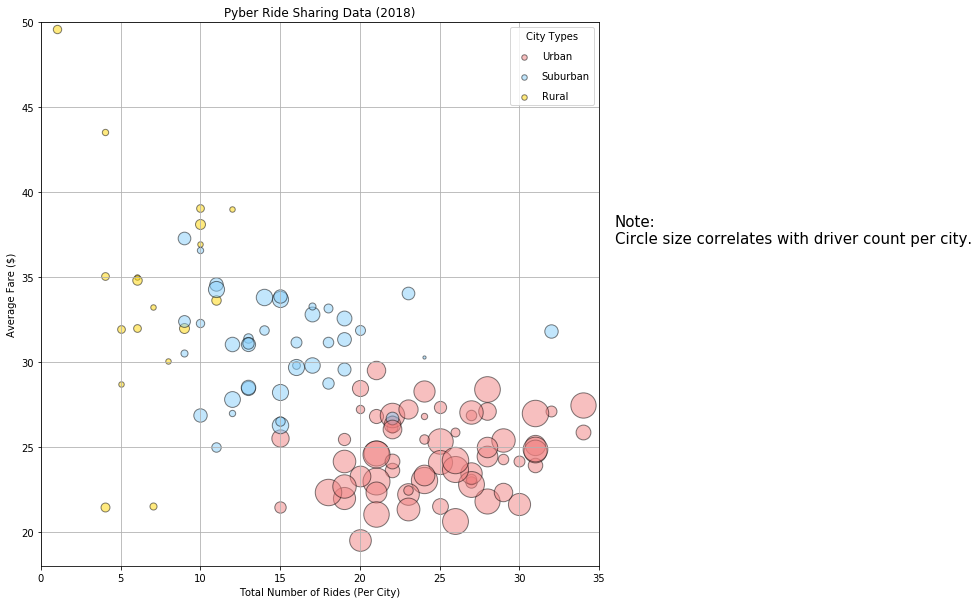

In [8]:
# bubble plot
# Gold, Light Sky Blue, and Light Coral
colors = {'Urban':'lightcoral',
          'Suburban':'lightskyblue',
          'Rural':'gold'}

plt.figure(figsize=(10,10))

plt.xlim(0, 35)
plt.ylim(18, 50)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")


for i, r in pyber_analysis_df.iterrows():
    plt.scatter(x=r['Total Number of Rides Per City'], 
                y=r['Average Fare'], 
                s=r['Total Number of Drivers Per City']*10,
                marker='o', 
                facecolors=colors.get(r['City Types']),
                edgecolors='black',
                alpha=0.5,
                linewidths= 1
                )
# Here we create a legend by ploting empty lists with the desired size and label
for city_type, color in colors.items():
    plt.scatter([],[], c=color, edgecolors='black', alpha=0.5, s=30, linewidths=1,label=city_type) 
plt.legend(scatterpoints=1, labelspacing=1, title='City Types')  

plt.grid(True)
# add a side note
plt.text(36,37, s="Note:\nCircle size correlates with driver count per city.",fontsize=15)
plt.savefig("bubble.png")
plt.show()

No handles with labels found to put in legend.


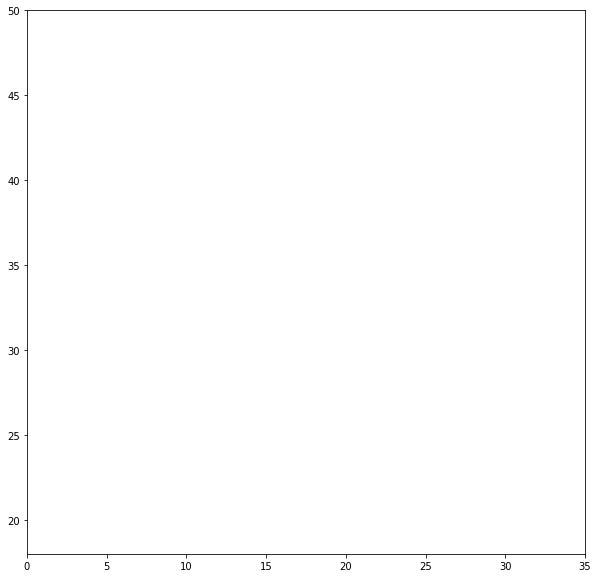

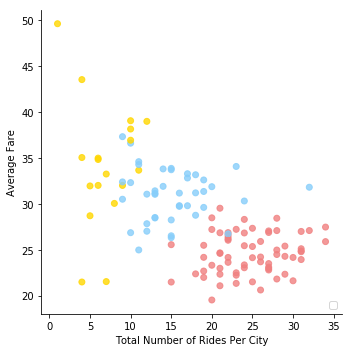

In [9]:
# use seaborn to create the bubble chart
plt.figure(figsize=(10,10))

plt.xlim(0, 35)
plt.ylim(18, 50)

plot_df = pyber_analysis_df
apply_color_to_series = lambda city_type: colors.get(city_type)
plot_df['Color'] = pyber_analysis_df['City Types'].apply(apply_color_to_series)

sns.lmplot(x='Total Number of Rides Per City',
            y='Average Fare',
            data=plot_df,
            fit_reg=False,
            scatter_kws={'Color': plot_df['Color']}
           )
plt.legend(loc='lower right')
plt.show()


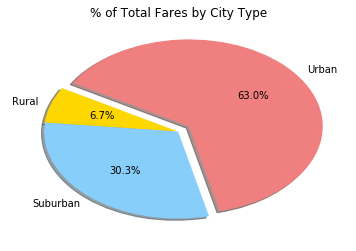

In [10]:
group_by_city_type = merged_df.groupby('type')
# % of the total fare by city type
total_fare_by_city = group_by_city_type['fare'].sum()
total_fare = total_fare_by_city.sum()
total_fare_percent_by_city = total_fare_by_city/total_fare * 100.0
# plot the pie chart for the percent of total fares by city type 
pie_city_types = total_fare_percent_by_city.index
pie_percents = total_fare_percent_by_city.values
colors_list = [colors.get(city_type) for city_type in pie_city_types]
explode = (0,0,0.1)
plt.pie(pie_percents, explode=explode, labels=pie_city_types, colors=colors_list, autopct="%1.1f%%", 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

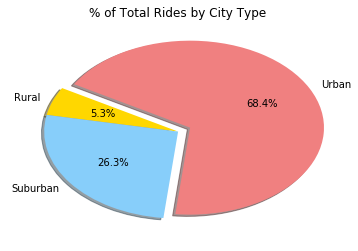

In [11]:
# % of Total Rides by City Type
total_rides_by_city = group_by_city_type.count()['ride_id']
total_rides = total_rides_by_city.sum()
total_ride_percents_by_city = total_rides_by_city / total_rides * 100.0

# plot the chart for the percent of total rides by city type
# plot the pie chart 
pie_city_types = total_ride_percents_by_city.index
pie_percents = total_ride_percents_by_city.values
colors_list = [colors.get(city_type) for city_type in pie_city_types]
explode = (0,0,0.1)
plt.pie(pie_percents, explode=explode, labels=pie_city_types, colors=colors_list, autopct="%1.1f%%", 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.show()

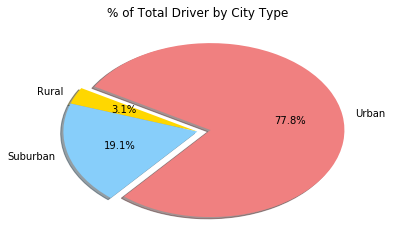

In [12]:
# % of Total Drivers by City Type

pyber_analysis_reset_pd = pyber_analysis_df.reset_index()
group_by_city_type = pyber_analysis_reset_pd.groupby('City Types')
total_drivers_by_city = group_by_city_type.sum()['Total Number of Drivers Per City']

total_drivers = total_drivers_by_city.sum()

total_driver_percents_by_city = total_drivers_by_city/total_drivers * 100.0

# plot the pie chart for the percent of total drivers by city type
pie_city_types = total_driver_percents_by_city.index
pie_percents = total_driver_percents_by_city.values
colors_list = [colors.get(city_type) for city_type in pie_city_types]
explode = (0,0,0.1)
plt.pie(pie_percents, explode=explode, labels=pie_city_types, colors=colors_list, autopct="%1.1f%%", 
        shadow=True, startangle=150)
plt.title("% of Total Driver by City Type")
plt.show()